In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [0]:
!unzip chronic-kidney-disease.zip

Archive:  chronic-kidney-disease.zip
replace new_model.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ls

breast-cancer-wisconsin-data.zip  heart.ipynb
Cancer.ipynb                      indian_liver_patient.csv
chronic-kidney-disease.zip        indian-liver-patient-records.zip
data.csv                          kidney.ipynb
diabetes.csv                      liver.ipynb
Diabeties.ipynb                   new_model.csv
heart.csv                         pima-indians-diabetes-database.zip
heart-disease-uci.zip


In [4]:
dataset=pd.read_csv('new_model.csv')
dataset

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [5]:
dataset.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [6]:
dataset.corr()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
Bp,1.000000,-0.164057,0.146060,0.190277,-0.151478,0.184173,0.144469,-0.103383,0.066791,-0.279441,0.025963,-0.220827,0.268003,0.290145
Sg,-0.164057,1.000000,-0.460835,-0.292053,0.253894,-0.249263,-0.176141,0.217456,-0.063450,0.492103,-0.206880,0.443437,-0.318956,-0.659504
Al,0.146060,-0.460835,1.000000,0.262564,-0.374484,0.405035,0.229396,-0.270709,0.114484,-0.548681,0.200664,-0.454131,0.478309,0.598389
Su,0.190277,-0.292053,0.262564,1.000000,-0.092940,0.126074,0.094568,-0.053448,0.180098,-0.156875,0.159033,-0.163825,0.253179,0.294555
Rbc,-0.151478,0.253894,-0.374484,-0.092940,1.000000,-0.236270,-0.138391,0.140568,0.018164,0.280991,-0.002205,0.202298,-0.139342,-0.282642
Bu,0.184173,-0.249263,0.405035,0.126074,-0.236270,1.000000,0.581176,-0.307357,0.336954,-0.540699,0.041530,-0.465947,0.387503,0.371982
Sc,0.144469,-0.176141,0.229396,0.094568,-0.138391,0.581176,1.000000,-0.624493,0.205361,-0.342053,-0.005420,-0.323056,0.273904,0.294076
Sod,-0.103383,0.217456,-0.270709,-0.053448,0.140568,-0.307357,-0.624493,1.000000,0.067414,0.333604,0.006334,0.316883,-0.306501,-0.342268
Pot,0.066791,-0.063450,0.114484,0.180098,0.018164,0.336954,0.205361,0.067414,1.000000,-0.100612,-0.074057,-0.120418,0.057028,0.077063
Hemo,-0.279441,0.492103,-0.548681,-0.156875,0.280991,-0.540699,-0.342053,0.333604,-0.100612,1.000000,-0.153806,0.681864,-0.576932,-0.729537


In [7]:
dataset.isnull().values.any()

False

In [0]:
sns.set(style="ticks", color_codes=True)


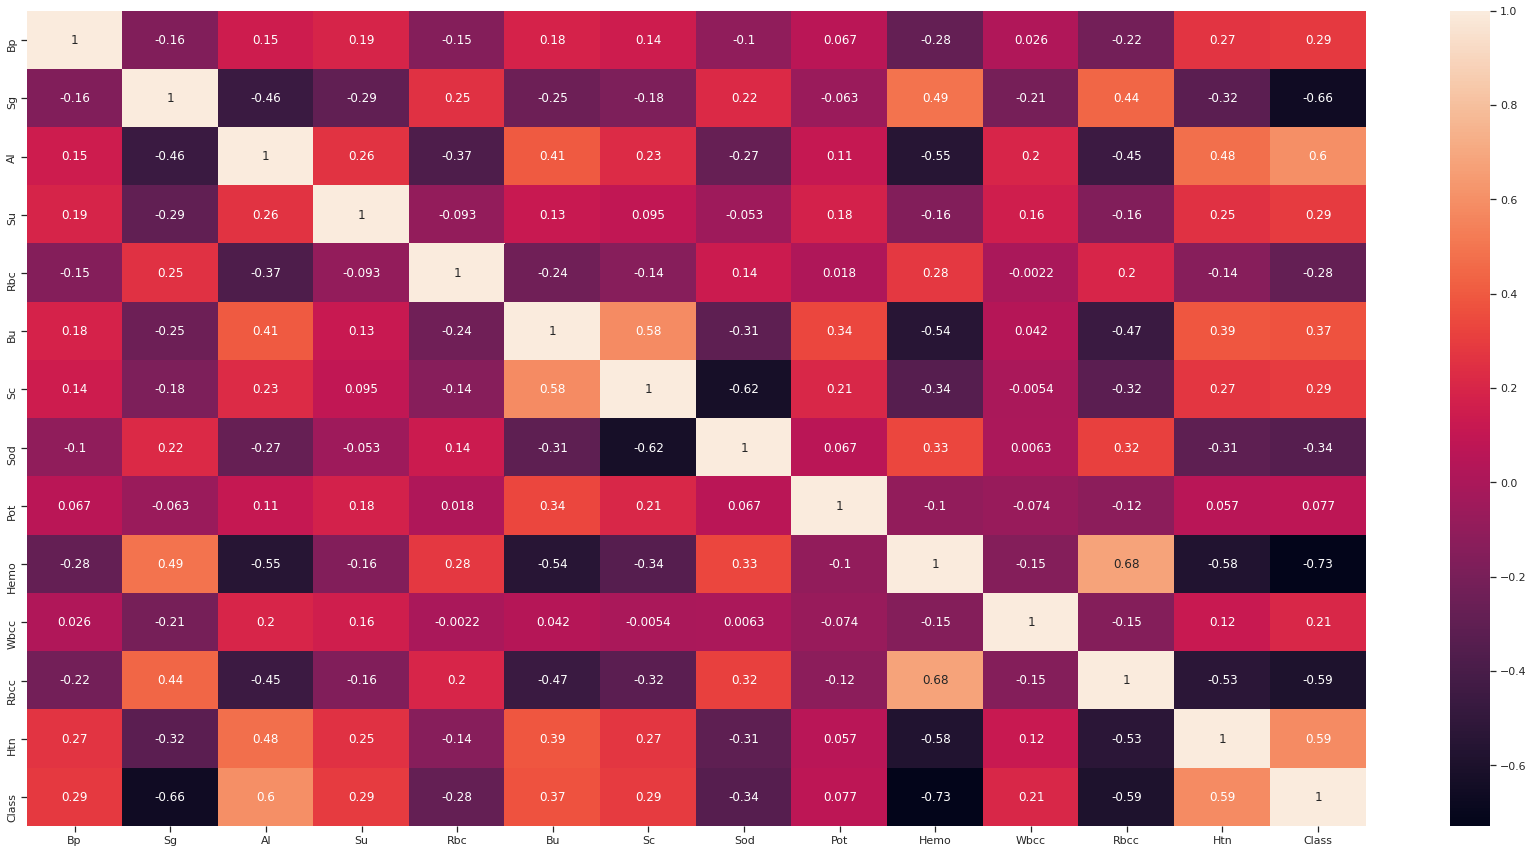

In [9]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [10]:
dataset.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


##Splitting of Data

In [0]:
features=dataset.iloc[:,:-1]
labels=dataset.iloc[:,[-1]]

In [12]:
features

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0


In [13]:
labels

,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


In [0]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

##Logistic Regression

In [15]:
model=LogisticRegression(max_iter=1000)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
label_pred=model.predict(feature_test)

In [17]:
m.accuracy_score(label_test,label_pred)

0.975

In [18]:
label_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [19]:
label_test

,Class
209,1
280,0
33,1
210,1
93,1
...,...
246,1
227,1
369,0
176,1


In [20]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [21]:
print(m.confusion_matrix(label_test,label_pred))

[[27  1]
 [ 1 51]]


##KNN

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [23]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
model.best_params_

{'n_neighbors': 1}

In [66]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
label_pred=model.predict(feature_test)

In [68]:
m.accuracy_score(label_test,label_pred)

0.725

In [69]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.57      0.86      0.69        28
           1       0.89      0.65      0.76        52

    accuracy                           0.73        80
   macro avg       0.73      0.76      0.72        80
weighted avg       0.78      0.72      0.73        80



In [70]:
print(m.confusion_matrix(label_test,label_pred))

[[24  4]
 [18 34]]


In [71]:
label_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [72]:
label_test

,Class
209,1
280,0
33,1
210,1
93,1
...,...
246,1
227,1
369,0
176,1


##Decision Tree

In [0]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20))}


In [33]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [34]:
model.best_params_

{'max_depth': 7}

In [36]:
model=DecisionTreeClassifier(max_depth=7)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
label_pred=model.predict(feature_test)

In [38]:
m.accuracy_score(label_test,label_pred)

0.9875

In [39]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [40]:
print(m.confusion_matrix(label_test,label_pred))

[[28  0]
 [ 1 51]]


In [41]:
label_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [42]:
label_test

,Class
209,1
280,0
33,1
210,1
93,1
...,...
246,1
227,1
369,0
176,1


##SVM

In [43]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
label_pred=model.predict(feature_test)

In [45]:
m.accuracy_score(label_test,label_pred)

0.9625

In [46]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.96      0.98      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [47]:
print(m.confusion_matrix(label_test,label_pred))

[[26  2]
 [ 1 51]]


In [48]:
label_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [49]:
label_test

,Class
209,1
280,0
33,1
210,1
93,1
...,...
246,1
227,1
369,0
176,1


##Random Forest Classifier

In [0]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],'max_depth':list(np.arange(1,20))}


In [51]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [52]:
model.best_params_

{'max_depth': 3, 'n_estimators': 30}

In [0]:
model=model.best_estimator_

In [0]:
label_pred=model.predict(feature_test)

In [55]:
m.accuracy_score(label_test,label_pred)

1.0

In [56]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [57]:
print(m.confusion_matrix(label_test,label_pred))

[[28  0]
 [ 0 52]]


In [58]:
label_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [59]:
label_test

,Class
209,1
280,0
33,1
210,1
93,1
...,...
246,1
227,1
369,0
176,1
